<div style="direction:rtl;line-height:300%;"><font face="XB Zar" size=5>
<div style="direction:rtl;line-height:300%;"><font face="XB Zar" size=5>
<div align=center>
<font face="IranNastaliq" size=30>
<p></p>
به نام خدا
</font>
<br>
<font color=#FF7500>
دانشگاه صنعتی شریف - دانشکده مهندسی کامپیوتر
</font>
<br>
<font color=blue>
داده‌ساختارها و الگوریتم‌ها
</font>
<br>
ترم دوم سال تحصیلی ۱۳۹۸-۱۳۹۷
</div>
<hr/>
<font color=red size=6>
<p></p>

<div align=center> فصل دوم، بخش دوم: مقایسه الگوریتم‌های مرتب‌سازی</div>
</font>
<div align=center>
امیرمحسن آهنچی، امیرحسین پویا، امیررضا مزینی، علی شریفی</div>
<hr>
</font></div>
<div>
<h3> فهرست محتویات</h3>
<ul style="margin-right: 0;">
<li><a href="#animations">پویانمایی الگوریتم‌های مرتب‌سازی</a></li>
<li><a href="#sort-times">مقایسه زمان اجرای الگوریتم‌های مرتب‌سازی</a></li>
</ul>
</div>

<div style="direction:rtl;line-height:300%;"><font face="B Nazanin" size=5>
<font color=#ff6600 size=5 id='section1'> <h1>
پویانمایی الگوریتم‌های مرتب‌سازی
</h1>
</font>
<p></p>
در این بخش ابتدا سعی می‌کنیم یک نمایش گرافیکی از الگوریتم‌های مختلف مرتب‌سازی ارائه دهیم. سپس با استفاده از برخی توابع ساده‌ی پایتون، زمان اجرای الگوریتم‌های مختلف مرتب‌سازی را برای داده‌های یکسان مقایسه خواهیم کرد.

ابتدا محیط Jupyter را برای رسم نمودار آماده‌ می‌کنیم. بدین منظور از دو دستور زیر استفاده می‌کنیم. دستور اول باعث می‌شود نمودارها به جای نمایش در یک پنجره‌ی جداگانه، در همین دفترچه Jupyter
رسم شوند. دستور دوم، توابع رسم نمودار را از کتاب‌خانه‌ی matplotlib
بارگذاری می‌کند.
</font></div>

In [1]:
%matplotlib inline 
from matplotlib.pyplot import *

<div style="direction:rtl;line-height:300%;"><font face="XB Zar" size=5>
یادآوری: هر کدام از انیمیشن های زیر نشان دهنده کدام روش مرتب سازی است؟
</font></div>

<div id="images">
<img src="BubbleSort_Avg_case.gif" style="float:right; width:31%">
<img src="insertion.gif" style="float:right; width:31%">
<img src="selectionsort.gif" style="float:right; width:31%">
<img src="merge.gif" style="float:right; width:31%">
<img src="quick_sort_partition_animation.gif" style="float:right; width:31%">
</div>

<div style="direction:rtl;line-height:300%;"><font face="XB Zar" size=5>
حال یک تابع به نام 
array_plot
تعریف می‌کنیم که مي‌تواند با دریافت وضعیت یک آرایه‌ی در حال مرتب‌سازی، آن را به صورت گرافیکی نمایش دهد. این تابع علاوه بر دریافت خود آرایه، دو اندیس $i$ و $j$ را دریافت می‌کند و 
عددهای قرار گرفته در این دوخانه از آرایه‌ را با رنگ متفاوتی نمایش می‌دهد. این رنگ متفاوت نشانه‌ی آن است که بر روی این دو عدد پردازش دارد صورت می‌گیرد (رنگ سبز به معنی مقایسه‌ی دو عدد و رنگ‌های قرمز و نارنجی به معنی جابه‌جایی آن‌ها در حین اجرای الگوریتم است).

برای رسم بهتر نمودار از کتاب‌خانه‌های time
برای ایجاد وقفه در به روز رسانی نمودار بین هر دو عمل متوالی و display برای پاک کردن گام قبلی در نمودار و ترسیم گام بعدی استفاده می‌کنیم.
</font></div>

In [1]:
from IPython import display
import time
  
def array_plot(A, i, j, swap=False):
    clf()
    color = ["blue"] * len(A)
    if (swap):
        color[i], color[j] = "orange","red"
    else:
        color[i] = color[j] = "green"
    bar(range(len(A)), A, color=color)
    display.display(gcf())    
    display.clear_output(wait=True)
    time.sleep(0.10)

<div style="direction:rtl;line-height:300%;"><font face="XB Zar" size=5>
می‌توانیم با فراخوانی این تابع در حین اجرای یک الگوریتم مرتب‌سازی، یک نمایش گرافیکی از روند اجرای الگوریتم ارائه دهیم. در مثال زیر روال اجرای الگوریتم مرتب‌سازی حبابی بر روی یک داده‌ی ورودی به تصویر کشیده می‌شود. برای آن که روند اجرای الگوریتم را ببینید باید علاوه بر قطعه‌کدهای بالا، قطعه کد زیر را هم اجرا کنید تا فرایند مرتب‌سازی را به صورت پویا ببینید.
</font></div>

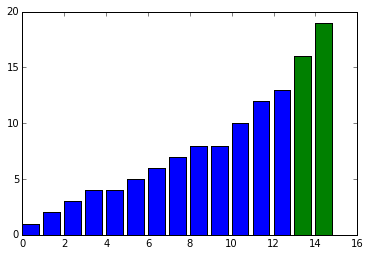

In [4]:
# Bubble sort, with graphical display
A = [5, 12, 3, 4, 7, 1, 8, 6, 19, 8, 13, 4, 2, 10, 16]
n = len(A)
for i in range(n - 1):
    for j in range(n - 1, i, -1):
        array_plot(A, j, j-1)
        if A[j] < A[j - 1]:
            A[j], A[j - 1] = A[j - 1], A[j]
            array_plot(A,j,j-1, True)

<div style="direction:rtl;line-height:300%;"><font face="XB Zar" size=5>
به عنوان تمرین می‌توانید فرایند اجرای سایر الگوریتم‌های مرتب‌سازی را با همین روش به صورت پویانمایی ترسیم کنید. 
در صورت لزوم می‌توانید روش رنگ‌آمیزی مقادیر مختلف آرایه‌ را بسته به نوع الگوریتم تغییر دهید (مثلا به جای استفاده از رنگ متفاوت برای دو عدد، یک سری عدد را متفاوت رنگ کنید)
</font></div>

<div style="direction:rtl;line-height:300%;"><font face="B Nazanin" size=5>
<font color=#ff6600 size=5 id='section1'> <h1>
مقایسه‌ی زمان اجرای الگوریتم‌های مرتب‌سازی
</h1>
</font>
<p></p>
برای مقایسه‌ی الگوریتم‌های مرتب‌سازی، ابتدا همه‌ی آن‌ها را به صورت چند تابع جدا از هم در فایل  های نوشته شده در جلسات قبل در فایل
mysorts.py
نوشته‌ایم. این فایل را می‌توانید در پوشه‌ی 
src/codes
که کنار این دفترچه قرار دارد مشاهده کنید. در پیاده‌سازی این الگوریتم‌ها تفاوت مختصری ایجاد شده، بدین صورت که از یک آرایه‌ی کمکی به نام $res$ استفاده کرده و نتیجه‌ی مرتب سازی را داخل آن می‌ریزیم. این کار باعث می‌شود ورودی تغییر نکند، در غیر این صورت هنگامی که بخواهیم چند الگوریتم را بر روی یک ورودی اجرا کنیم الگوریتم اول ورودی را مرتب می‌کند و الگوریتم‌های بعدی با یک آرایه‌ی از پیش مرتب شده روبرو خواهند بود.
<p></p>
برای بارگذاری این توابع از mysorts.py، از دستور زیر استفاده می‌کنیم:
</font></div>

In [4]:
from src.codes.mysorts import *

<div style="direction:rtl;line-height:300%;"><font face="XB Zar" size=5>
حال دو تابع تعریف می‌کنیم: تابع get_time که با دریافت یک تابع 
    به نام $f$ و یک ورودی به نام $input$، تابع را بر روی ورودی اجرا 
    می‌کند و مدت زمانی که اجرای تابع روی آن ورودی طول می‌کشد را بر حسب میکروثانیه برمی‌گرداند.
    </font></div>

In [5]:
import timeit
def get_time(f, input):
    start = timeit.default_timer()
    f(input)
    stop = timeit.default_timer()
    return (stop - start) * 1000 * 1000 #microseconds

<div style="direction:rtl;line-height:300%;"><font face="XB Zar" size=5>
تابع دوم که get_avg_time نام دارد با دریافت تابع $f$ و ورودی $input$ متوسط زمان اجرای تابع $f$ روی ورودی را به دست می‌آورد.
<p></p>
بدین منظور در هر «مرحله» تابع $f$ را به تعداد $r$ بار روی ورودی فرا می‌خواند و متوسط زمان اجرا را به ازای این $r$ بار اجرا محاسبه می‌کند. این کار را $s$ مرحله تکرار می‌کند و نهایتا از همه‌ی $s$ مرحله حداقل می‌گیرد. 
این کار به خاطر آن است که پردازنده‌ی کامپیوتر به طور هم‌زمان ممکن است مشغول کارهای دیگری هم باشد. بدین ترتیب سعی می‌کنیم اثر پردازش‌های دیگر روی زمان محاسبه شده را به حداقل برسانیم. (نوع انجام این فرایند قدری سلیقه‌ای است. مثلا اگر پردازنده مشغول محاسبات دیگری نباشد شاید حتی یک بار محاسبه‌ی زمان اجرای تابع $f$ روی ورودی هم کافی باشد)
</font></div>

In [6]:
def get_avg_time(f, input):
    res = 1 << 30 #inf
    s = 10
    r = 2
    # s: number of times to run the function and choose the minimum
    # r: number of times to get average
    for i in range(s):
        sum = 0
        for j in range(r): 
            sum += get_time(f, input)
        res = min(res, sum / float(r))
    return res

<div style="direction:rtl;line-height:300%;"><font face="XB Zar" size=5>
نوبت به تعریف دو تابع برای رسم نمودار زمان اجرای هر الگوریتم بر روی ورودی‌های مختلف است.
در اینجا دو تابع plot1 و plot2 تعریف کرده‌ایم که اولی سه الگوریتم و دومی پنج الگوریتم مرتب‌سازی را بر روی ورودی‌های داده‌شده اجرا و زمان آن را رسم می‌کند.
<p></p>
توجه کنید که هر الگوریتم قرار است بر روی آرایه‌های با اندازه‌های مختلف اجرا و زمان آن محاسبه شود. پس ورودی‌های هریک از دو تابع plot1
و plot2 عبارتند از:
<p></p>
$N$: یک آرایه از اندازه‌های مختلف ورودی. عدد $N_i$ اندازه‌ی ورودی $i$ ام را مشخص می‌کند.
<p></p>
$numbers$: یک لیست از آرایه‌های ورودی. $numbers_i$ یک آرایه به طول $N_i$ است.
<p></p>
اگر نوع مقدار دهی $N$ و $numbers$ برایتان روشن نیست بلافاصله بعد از تعریف این دو تابع روش مقداردهی آن‌ها را خواهید دید.
</font></div>

In [7]:
def plot1(N, numbers):
    figure(figsize=(20, 10))
    xlabel("Size of array (n)")
    ylabel("Time")
    y = [get_avg_time(insertion_sort, a) for a in numbers]
    plot(N, y, 'r', label='Insertion Sort',linewidth=5)
    y = [get_avg_time(selection_sort, a) for a in numbers]
    plot(N, y, 'b', label='Selection Sort',linewidth=5)
    y = [get_avg_time(bubble_sort, a) for a in numbers]
    plot(N, y, 'g', label='Bubble Sort',linewidth=5)
    legend(loc=2)

In [8]:
def plot2(N, numbers):
    figure(figsize=(20, 10))
    xlabel("Size of array (n)")
    ylabel("Time")
    y = [get_avg_time(insertion_sort, a) for a in numbers]
    plot(N, y, 'r', label='Insertion Sort',linewidth=5)
    y = [get_avg_time(selection_sort, a) for a in numbers]
    plot(N, y, 'b', label='Selection Sort',linewidth=5)
    y = [get_avg_time(bubble_sort, a) for a in numbers]
    plot(N, y, 'g', label='Bubble Sort',linewidth=5)

    y = [get_avg_time(bucket_sort, a) for a in numbers]
    plot(N, y, 'y', label='Bucket Sort',linewidth=5)
    y = [get_avg_time(radix_sort, a) for a in numbers]
    plot(N, y, 'k', label='Radix Sort',linewidth=5)
    legend(loc=2)

<div style="direction:rtl;line-height:300%;"><font face="XB Zar" size=5>
نوبت به مقداردهی $N$ و $numbers$ است.<p></p>
برای این کار ابتدا مقادیر مختلف $N$ تعریف می‌کنیم:
</font></div>

In [9]:
from random import randrange
max_N = 500
N = [1, 5] + list (range(100, max_N, 50))
print(N)

[1, 5, 100, 150, 200, 250, 300, 350, 400, 450]


<div style="direction:rtl;line-height:300%;"><font face="XB Zar" size=5>
حال بر اساس اندازه‌های انتخاب شده، آرایه از اعداد تصادفی بین ۱ تا ۱۰۰۰۰۰ درست می‌کنیم. 
</font></div>

In [12]:
numbers = [[randrange(100000) for j in range(i)] for i in N]
print(numbers[1])

[95258, 33044, 62362, 66317, 51849]


<div style="direction:rtl;line-height:300%;"><font face="XB Zar" size=5>
حال نوبت به رسم نمودارها می‌رسد:
</font></div>

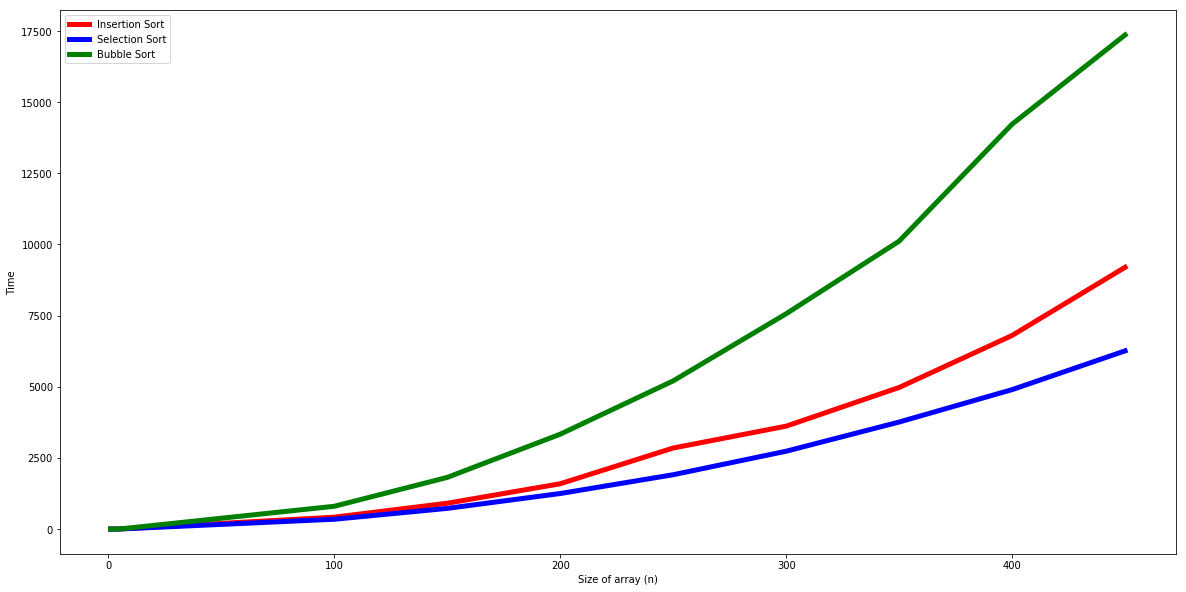

In [13]:
plot1(N, numbers)

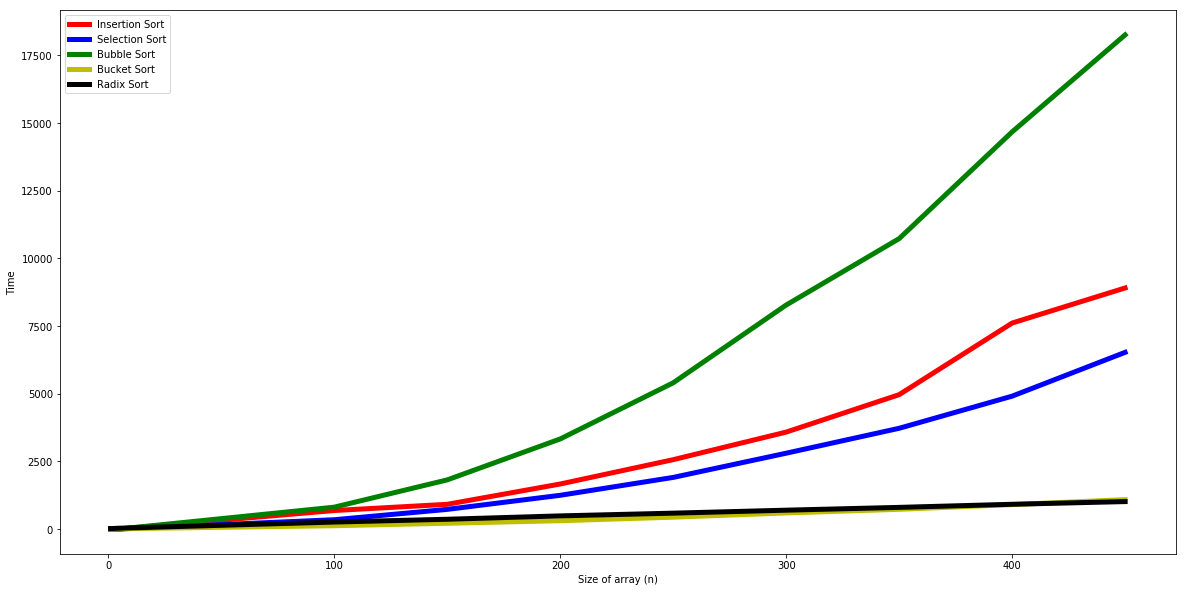

In [14]:
plot2(N, numbers)

<div style="direction:rtl;line-height:300%;"><font face="XB Zar" size=5>
<p></p>
چه توجیهی برای این رفتار توابع دارید؟
<br>
چرا bucket sort تقریبا ثابت عمل کرده است؟
<br>
چرا radix sort به این شدت بهتر عمل کرده است؟
<br>
به نظر شما نوع ورودی در کدام روش ها تاثیر دارد؟ 
<p></p>
این نمودار ها نشان دهنده عملکرد روش ها در حالت میانگین است.
<p></p>
حال اعداد تولید شده، اعداد مرتب و معکوس شده هستند
</font></div>

In [15]:
numbers = [list(range(i, 0, -1)) for i in N]
print(numbers[1])

[5, 4, 3, 2, 1]


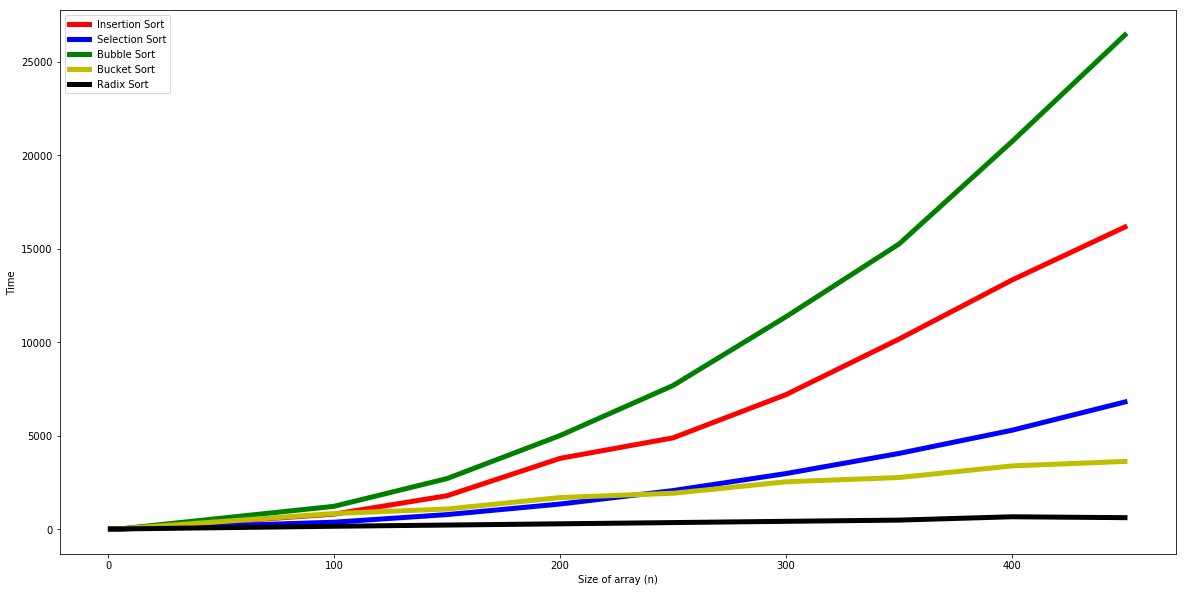

In [16]:
plot2(N, numbers)

<div style="direction:rtl;line-height:300%;"><font face="XB Zar" size=5>
<p></p>
<p></p>
حال اعداد تولید شده، اعداد مرتب شده هستند
</font></div>

In [17]:
numbers = [list(range(i)) for i in N]
print(numbers[1])

[0, 1, 2, 3, 4]


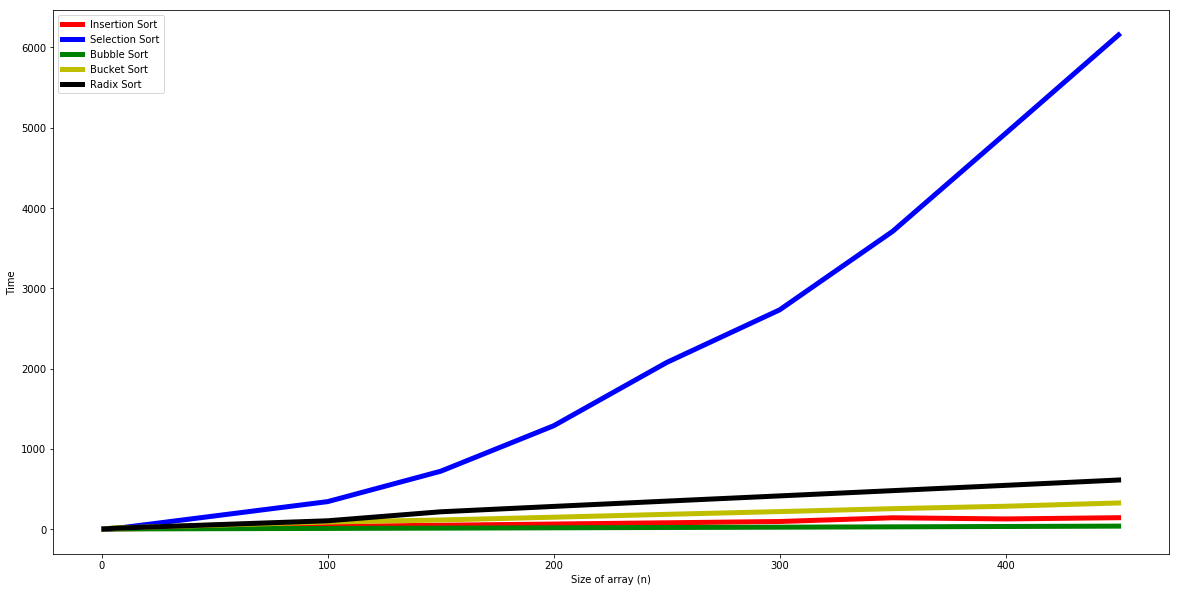

In [18]:
plot2(N, numbers)

<div style="direction:rtl;line-height:300%;"><font face="XB Zar" size=5>
<p></p>
چرا در این نوع ورودی 
insertion sort و bubble sort
خیلی خوب عمل کرده اند؟
<br>
نوع ورودی در کدام روش ها تاثیر دارد؟ تاثیر ورودی را توضیح دهید.
</font></div>

<div style="direction:rtl;line-height:300%;"><font face="XB Zar" size=5>
<p></p>
    جدول زیر مقایسه ای ابتدایی برای انتخاب الگوریتم مناسب برای مرتب‌سازی پیش‌می‌نهد:
<br>
<table>
<tr>
  <th>معیار</th>
  <th>نوع مرتب‌سازی</th>
</tr>
<tr>
  <tr>
  <td>تعداد انواع داده‌ها کم است.</td>
  <td>insertion sort</td>
</tr>
<tr>
  <td>داده ها از پیش تقریبا مرتب شده هستند</td>
  <td>insertion sort</td>
</tr>
<tr>
  <td>عمل‌کرد در بدترین حالت بسیار مرود توجه است.</td>
  <td>heap sort</td>
</tr>
  <tr>
  <td>عمل‌کرد خوب در حالت میانگین موردنظر است.</td>
  <td>quick sort</td>
</tr>
<tr>
  <tr>
  <td>می‌خواهیم کوتاه‌ترین کد ممکن را بنویسیم.</td>
  <td>insertion sort</td>
</tr> 
<tr>
  <tr>
  <td>داده‌ها از یک توزیع یکنواخت می‌آیند.</td>
  <td>bucket sort</td>
</tr>
<tr>
  <tr>
  <td>از لیست پیوندی استفاده کرده‌ایم.</td>
  <td>merge sort</td>
</tr>
</table>
    

</font></div>

<div style="direction:rtl;line-height:300%;border-radius:25px;border:2px solid #73AD21;padding:20px;"><font face="B Nazanin" size=5>
<font color=#40bf40 size=5 id='section1'> 
    <h2>
    برای مطالعه
    </h2>
</font>
   <p></p>
    
    
جهت مشاهده پویانمایی نحوه‌ی کار داد‌ساختار‌ها و الگوریتم‌های مختلف، از جمله انواع مرتب‌سازی‌ها که در این فصل به آن‌ها اشاره شد، می‌توانید به سایت
<a href="https://visualgo.net/"> https://visualgo.net </a>
مراجعه کنید.</font>
</div>